# Hadoop Assignment Codes and outputs

## 1 Create DIR, copy file and check if the file availability status:

Code to create a new DIR:
```
docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -mkdir -p /user/shyam/reliance_jio
```
Once DIR is created then check if the DIR is visible :

```
docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -ls -h /user/shyam
```

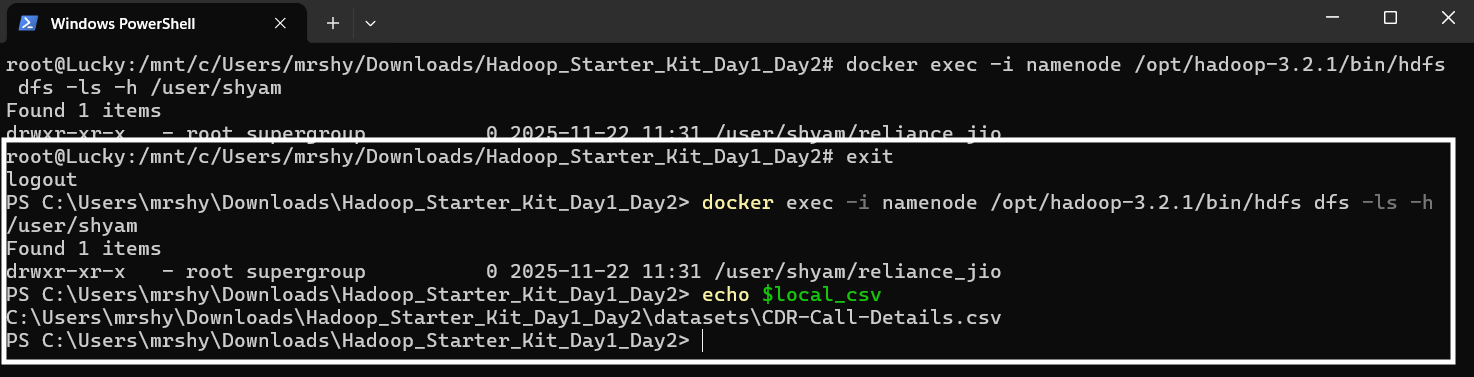


Assign a variable $local_csv for file path then test the value using

code : 
```
$local_csv = "C:\Users\mrshy\Downloads\Hadoop_Starter_Kit_Day1_Day2\datasets\CDR-Call-Details.csv"
```
code:
```
echo $local_csv

```

code :
```
Get-Content -Raw $local_csv | docker exec -i namenode hdfs dfs -put -f - /user/shyam/reliance_jio/cdr.csv
```

while the file is copying the Brwoser Directory will show as copying. Please wait while it copies

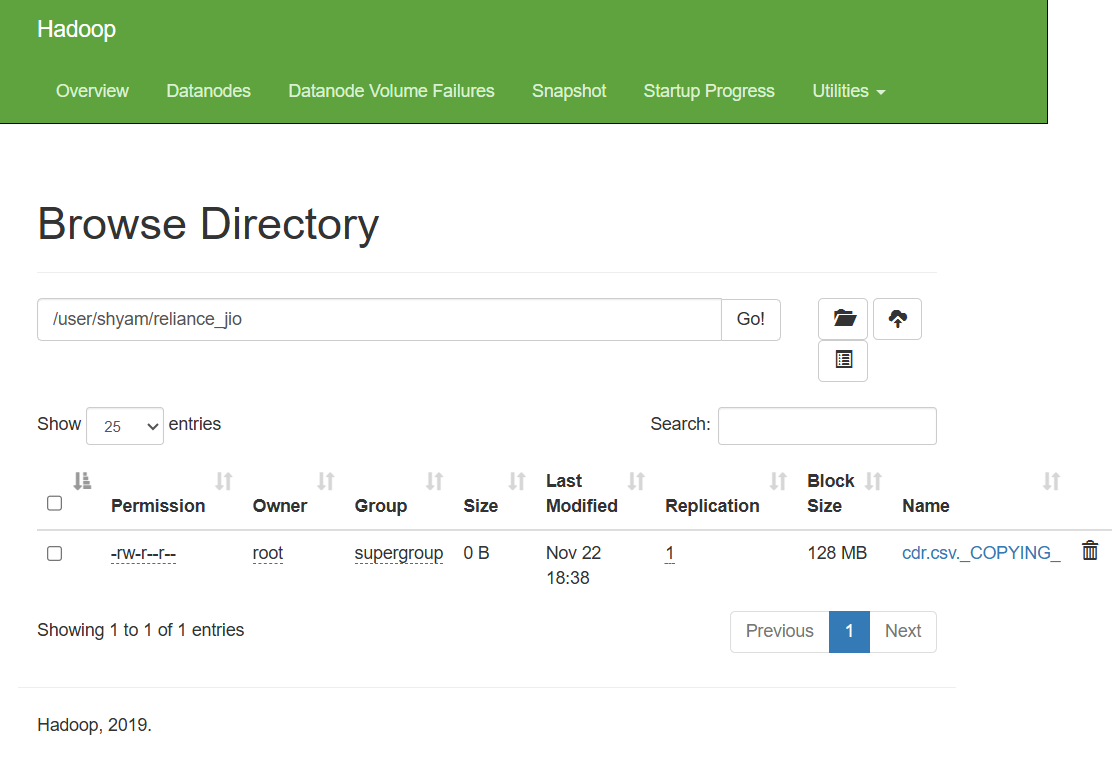

check if the file is available:
```
PS C:\Users\mrshy\Downloads\Hadoop_Starter_Kit_Day1_Day2> docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -ls -h /user/shyam/reliance_jio/
Found 1 items
-rw-r--r--   1 root supergroup      7.8 M 2025-11-22 13:08 /user/shyam/reliance_jio/cdr.csv
```

reading the lines in power shell using Select-Object -First 5

```
docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv | Select-Object -First 5

```

if using wsl then apply linux code :

```
docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv | head -n 5

```

Power Shell Output:
```
PS C:\Users\mrshy\Downloads\Hadoop_Starter_Kit_Day1_Day2> docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv | Select-Object -First 5
2025-11-22 13:30:27,428 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,FALSE
371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,FALSE
358-1921,137,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,FALSE
375-9999,84,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,FALSE
```

WSL Ubuntu Output:
```
root@Lucky:/mnt/c/Users/mrshy# docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv|head
2025-11-22 13:28:45,162 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,FALSE
371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,FALSE
358-1921,137,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,FALSE
375-9999,84,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,FALSE
330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,FALSE
391-8027,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0,FALSE
355-9993,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,FALSE
329-9001,147,0,157,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,FALSE
335-4719,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,FALSE
```

## 2.  Basic MapReduce Program (using Shell Scripting)

##### steps to create mapper and reducer files

open nano editor in wsl:
```
nano mapper.sh
```

Once the nano editor is open then use the below code for mapper.sh file

```
read header

while IFS=',' read -r phone acct_len vmail day_mins day_calls day_charge \
    eve_mins eve_calls eve_charge night_mins night_calls night_charge \
    intl_mins intl_calls intl_charge custserv_calls churn
do
    echo -e "Day\t${day_calls}"
    echo -e "Evening\t${eve_calls}"
    echo -e "Night\t${night_calls}"
    echo -e "International\t${intl_calls}"
done

```
use command ctrl+x and hit enter key and don't change teh the file name.


Again use the same above process for reducer.sh file

```
current_type=""
current_sum=0

while read -r line
do
    call_type=$(echo "$line" | cut -f1)
    count=$(echo "$line" | cut -f2)

    if [ "$call_type" == "$current_type" ]; then
        current_sum=$((current_sum + count))
    else
        if [ -n "$current_type" ]; then
            echo -e "${current_type}\t${current_sum}"
        fi
        current_type=$call_type
        current_sum=$count
    fi
done

# Output last key
if [ -n "$current_type" ]; then
    echo -e "${current_type}\t${current_sum}"
fi
```

These two mapper.sh and reducer.sh are saved in the temp folder. Please create these files again if you've logged off from wsl.

* Next steps to execute and test

Make the .sh file as executable using chmod command

```
chmod +x mapper.sh reducer.sh

```



##### Testing the mapper and reducer files

First read the file which you want to test the mapper and reducer.
```
docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/crd.csv|head -n 100|./mapper.sh | sort | ./reducer.sh

```

* Once the first 100 lines are completed then we need run the code without any row constraint
```
docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/crd.csv|head|./mapper.sh | sort | ./reducer.sh
```

Total Count of the date files = 101176
```
docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/crd.csv| wc -l

```
Due to file size it's taking more time.

```
hadoop jar /opt/hadoop-3.2.1/share/hadoop/tools/lib/hadoop-streaming-*.jar \
    -input /user/shyam/reliance_jio/cdr.csv \
    -output /user/shyam/output/call_type_count \
    -mapper mapper.sh \
    -reducer reducer.sh \
    -file mapper.sh \
    -file reducer.sh
```

* Due to high turn around time i've provided output for sample of 500 ,1000, 5000 and all lines.

```
root@Lucky:/mnt/c/Users/mrshy# docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv|head -n 500|./mapper.sh | sort | ./reducer.sh
2025-11-23 10:11:13,024 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
Day     50538
Evening 49585
International   2248
Night   49402
```

```
root@Lucky:/mnt/c/Users/mrshy# docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv|wc -l
2025-11-23 10:12:51,516 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
101176
root@Lucky:/mnt/c/Users/mrshy# docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv|head -n 1000|./mapper.sh | sort | ./reduce
r.sh
2025-11-23 10:13:49,086 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
Day     100449
Evening 99696
International   4547
Night   99876
```

```
root@Lucky:/mnt/c/Users/mrshy# docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv|head -n 5000|./mapper.sh | sort | ./reduce
r.sh
2025-11-23 10:18:28,154 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
Day     774453
Evening 778811
International   26012
Night   777414
```

```
root@Lucky:/mnt/c/Users/mrshy# docker exec -i namenode /opt/hadoop-3.2.1/bin/hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv|./mapper.sh | sort |
./reducer.sh
2025-11-23 11:47:05,724 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
Day 27034463
Evening 27030347
International 580516
Night 26474523
root@Lucky:/mnt/c/Users/mrshy# 
```

```
root@98cd669b6cd4:/# hdfs dfs -cat /user/shyam/output/call_type_count/part-*
2025-11-23 16:07:15,047 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
Day     27034463
Evening 27030347
International   580516
Night   26474523
```
* <u>Total time taken is 3h 30 Min aprox.</u>

* While running the mapper and reducer for the job new folder where designated output is saved is created and untill the files are created it'll show as _temporary under browser system.

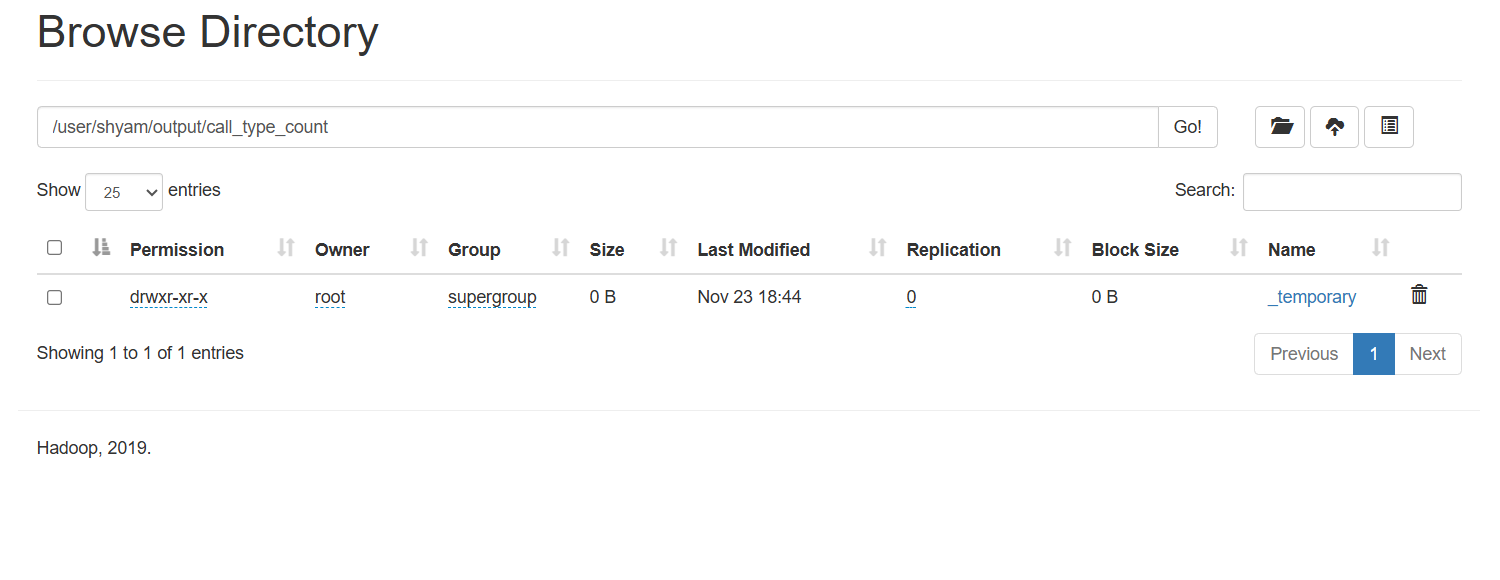

* Once run is completed then check for success and part file as shown below:
  
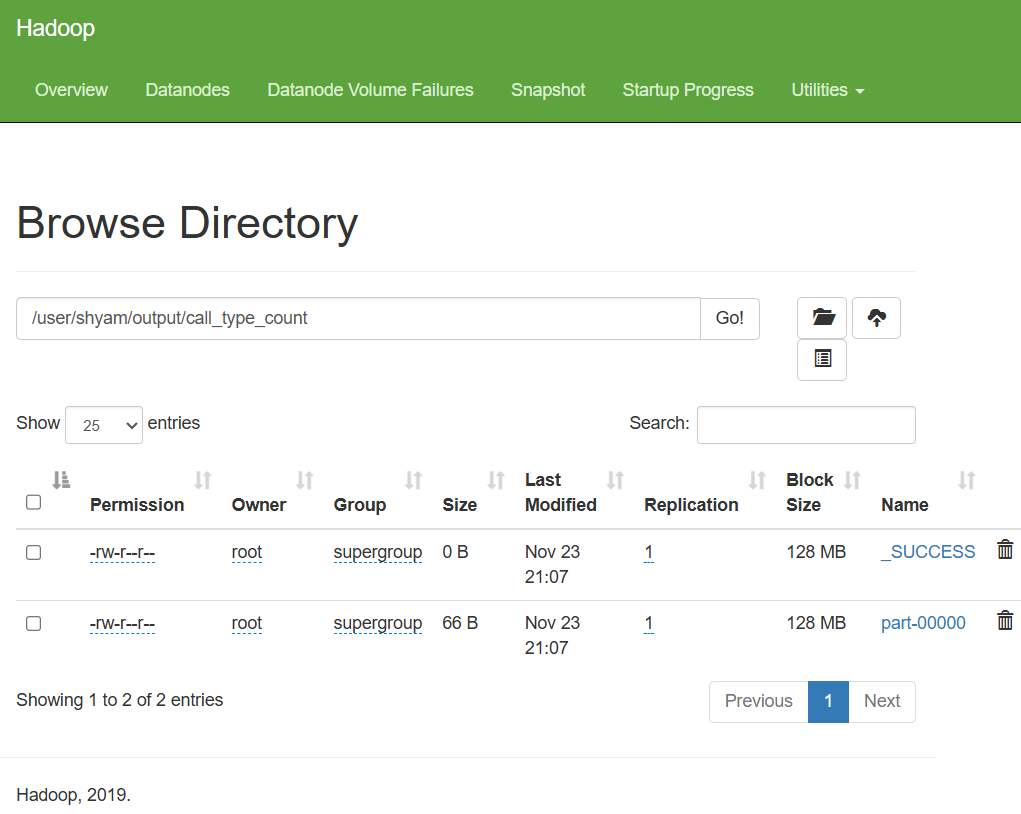

## 3 Total Call duration per Customer

* Execute the copied code in bash ( docker exec -it namenode bash)

* Below is code for mapper_duration.sh in wls

  
```
root@Lucky:/mnt/c/Users/mrshy# nano mapper_duration.sh
```
* code :
    
```
#!/bin/bash 
awk -F, 'NR>1 {  
total_duration = $4 + $6 + $8 + $10;  
print $1 "\t" total_duration;  
}'

```
* Below is the code for reducer_duration.sh in wsl
```
root@Lucky:/mnt/c/Users/mrshy# nano reducer_duration.sh
```
* code : 

```
#!/bin/bash 
awk '{ duration[$1] += $2 } END { for (k in duration) print k "\t" duration[k] }'
```
* Below is process to copy the wsl file to name node :
  
```
root@Lucky:/mnt/c/Users/mrshy# docker cp mapper_duration.sh namenode:/mapper_duration.sh
Successfully copied 2.05kB to namenode:/mapper_duration.sh
root@Lucky:/mnt/c/Users/mrshy# docker cp reducer_duration.sh namenode:/reducer_duration.sh
Successfully copied 2.05kB to namenode:/reducer_duration.sh
```
* Initiate Bash under namenode then check for mapper and reducer file availability:
```
root@Lucky:/mnt/c/Users/mrshy# docker exec -it namenode bash
root@98cd669b6cd4:/#ls -l mapper_duration.sh reducer_duration.sh
-rwxrwxrwx 1 root root 105 Nov 23 14:32 mapper_duration.sh
-rwxrwxrwx 1 root root  95 Nov 23 14:33 reducer_duration.sh
```
* make the file executable
```
root@98cd669b6cd4:/# chmod +x mapper_duration.sh reducer_duration.sh
```
* Test the mapper and reducer files for small lines of data:
  
```
root@98cd669b6cd4:/# hdfs dfs -cat /user/shyam/reliance_jio/cdr.csv | head -n 100 | ./mapper_duration.sh |sort| ./reducer_duration.sh
2025-11-23 14:39:50,795 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
cat: Unable to write to output stream.
358-1921557.38
353-2630        487.8
341-9764        380.47
340-4953        505.63
399-4246        507.38
352-8305        475.38
413-4957        557.32
400-9770        382.96
351-7269        647.09
332-8160        540.92
331-7425        609.52
419-2637        464.45
...[OUTPUT TRUNCATED DUE TO LARGE LINES OF OUTPUT ]
```

* <B>Run the mapper and reducer using the hadoop-streaming-3.21.jar and wait for program to creat output :</B>
  
```
root@98cd669b6cd4:/# hadoop jar /opt/hadoop-3.2.1/share/hadoop/tools/lib/hadoop-streaming-3.2.1.jar -D mapreduce.framework.name=local -files mapper_duration.sh,reducer_duration.sh   -mapper mapper_duration.sh   -reducer reducer_duration.sh   -input /user/shyam/reliance_jio/cdr.csv   -out
put /user/shyam/output/total_duration
2025-11-23 14:54:27,964 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2025-11-23 14:54:28,377 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2025-11-23 14:54:28,377 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2025-11-23 14:54:28,586 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2025-11-23 14:54:30,768 INFO mapred.FileInputFormat: Total input files to process : 1
2025-11-23 14:54:31,046 INFO mapreduce.JobSubmitter: number of splits:1
2025-11-23 14:54:32,008 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1877598540_0001
2025-11-23 14:54:32,009 INFO mapreduce.JobSubmitter: Executing with tokens: []
2025-11-23 14:54:33,506 INFO mapred.LocalDistributedCacheManager: Localized file:/mapper_duration.sh as file:/tmp/hadoop-root/mapred/local/job_local1877598540_0001_9d59689a-0b7d-4d0a-b6d9-3097d126e833/mapper_duration.sh
2025-11-23 14:54:33,798 INFO mapred.LocalDistributedCacheManager: Localized file:/reducer_duration.sh as file:/tmp/hadoop-root/mapred/local/job_local1877598540_0001_d22eecfa-923a-4b83-8b3d-462595b32607/reducer_duration.sh
2025-11-23 14:54:34,710 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2025-11-23 14:54:34,745 INFO mapreduce.Job: Running job: job_local1877598540_0001
2025-11-23 14:54:34,768 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2025-11-23 14:54:34,801 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapred.FileOutputCommitter
2025-11-23 14:54:34,855 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2025-11-23 14:54:34,859 INFO output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false
2025-11-23 14:54:35,587 INFO mapred.LocalJobRunner: Waiting for map tasks
2025-11-23 14:54:35,676 INFO mapred.LocalJobRunner: Starting task: attempt_local1877598540_0001_m_000000_0
2025-11-23 14:54:35,853 INFO mapreduce.Job: Job job_local1877598540_0001 running in uber mode : false
2025-11-23 14:54:35,944 INFO mapreduce.Job:  map 0% reduce 0%
2025-11-23 14:54:36,240 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2025-11-23 14:54:36,241 INFO output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false
2025-11-23 14:54:36,384 INFO mapred.Task:  Using ResourceCalculatorProcessTree : [ ]
2025-11-23 14:54:36,482 INFO mapred.MapTask: Processing split: hdfs://namenode:8020/user/shyam/reliance_jio/cdr.csv:0+8191463
2025-11-23 14:54:36,701 INFO mapred.MapTask: numReduceTasks: 1
2025-11-23 14:54:39,007 INFO mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)
2025-11-23 14:54:39,008 INFO mapred.MapTask: mapreduce.task.io.sort.mb: 100
2025-11-23 14:54:39,008 INFO mapred.MapTask: soft limit at 83886080
2025-11-23 14:54:39,015 INFO mapred.MapTask: bufstart = 0; bufvoid = 104857600
2025-11-23 14:54:39,016 INFO mapred.MapTask: kvstart = 26214396; length = 6553600
2025-11-23 14:54:39,041 INFO mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer
2025-11-23 14:54:39,129 INFO streaming.PipeMapRed: PipeMapRed exec [/./mapper_duration.sh]
2025-11-23 14:54:39,226 INFO Configuration.deprecation: mapred.work.output.dir is deprecated. Instead, use mapreduce.task.output.dir
2025-11-23 14:54:39,239 INFO Configuration.deprecation: map.input.start is deprecated. Instead, use mapreduce.map.input.start
2025-11-23 14:54:39,261 INFO Configuration.deprecation: mapred.task.is.map is deprecated. Instead, use mapreduce.task.ismap
2025-11-23 14:54:39,264 INFO Configuration.deprecation: mapred.task.id is deprecated. Instead, use mapreduce.task.attempt.id
2025-11-23 14:54:39,265 INFO Configuration.deprecation: mapred.tip.id is deprecated. Instead, use mapreduce.task.id
2025-11-23 14:54:39,266 INFO Configuration.deprecation: mapred.local.dir is deprecated. Instead, use mapreduce.cluster.local.dir
2025-11-23 14:54:39,269 INFO Configuration.deprecation: map.input.file is deprecated. Instead, use mapreduce.map.input.file
2025-11-23 14:54:39,273 INFO Configuration.deprecation: mapred.skip.on is deprecated. Instead, use mapreduce.job.skiprecords
2025-11-23 14:54:39,275 INFO Configuration.deprecation: map.input.length is deprecated. Instead, use mapreduce.map.input.length
2025-11-23 14:54:39,326 INFO Configuration.deprecation: mapred.job.id is deprecated. Instead, use mapreduce.job.id
2025-11-23 14:54:39,327 INFO Configuration.deprecation: user.name is deprecated. Instead, use mapreduce.job.user.name
2025-11-23 14:54:39,329 INFO Configuration.deprecation: mapred.task.partition is deprecated. Instead, use mapreduce.task.partition
2025-11-23 14:54:40,110 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2025-11-23 14:54:42,908 INFO streaming.PipeMapRed: R/W/S=1/0/0 in:0=1/3 [rec/s] out:0=0/3 [rec/s]
2025-11-23 14:54:42,909 INFO streaming.PipeMapRed: R/W/S=10/0/0 in:3=10/3 [rec/s] out:0=0/3 [rec/s]
2025-11-23 14:54:42,943 INFO streaming.PipeMapRed: R/W/S=100/0/0 in:33=100/3 [rec/s] out:0=0/3 [rec/s]
2025-11-23 14:54:43,324 INFO streaming.PipeMapRed: R/W/S=1000/0/0 in:333=1000/3 [rec/s] out:0=0/3 [rec/s]
2025-11-23 14:54:43,445 INFO streaming.PipeMapRed: Records R/W=5002/1
2025-11-23 14:54:44,147 INFO streaming.PipeMapRed: R/W/S=10000/8324/0 in:2500=10000/4 [rec/s] out:2081=8324/4 [rec/s]
2025-11-23 14:54:48,003 INFO streaming.PipeMapRed: R/W/S=100000/98006/0 in:12500=100000/8 [rec/s] out:12250=98006/8 [rec/s]
2025-11-23 14:54:48,100 INFO streaming.PipeMapRed: MRErrorThread done
2025-11-23 14:54:48,122 INFO streaming.PipeMapRed: mapRedFinished
2025-11-23 14:54:48,152 INFO mapred.LocalJobRunner: 
2025-11-23 14:54:48,153 INFO mapred.MapTask: Starting flush of map output
2025-11-23 14:54:48,153 INFO mapred.MapTask: Spilling map output
2025-11-23 14:54:48,153 INFO mapred.MapTask: bufstart = 0; bufend = 1635717; bufvoid = 104857600
2025-11-23 14:54:48,153 INFO mapred.MapTask: kvstart = 26214396(104857584); kvend = 25809700(103238800); length = 404697/6553600
2025-11-23 14:54:48,857 INFO mapred.LocalJobRunner: Records R/W=5002/1 > sort
2025-11-23 14:54:49,628 INFO mapreduce.Job:  map 67% reduce 0%
2025-11-23 14:54:50,036 INFO mapred.MapTask: Finished spill 0
2025-11-23 14:54:50,111 INFO mapred.Task: Task:attempt_local1877598540_0001_m_000000_0 is done. And is in the process of committing
2025-11-23 14:54:50,240 INFO mapred.LocalJobRunner: Records R/W=5002/1
2025-11-23 14:54:50,241 INFO mapred.Task: Task 'attempt_local1877598540_0001_m_000000_0' done.
2025-11-23 14:54:50,379 INFO mapred.Task: Final Counters for attempt_local1877598540_0001_m_000000_0: Counters: 23
        File System Counters
                FILE: Number of bytes read=176960
                FILE: Number of bytes written=2547774
                FILE: Number of read operations=0
                FILE: Number of large read operations=0
                FILE: Number of write operations=0
                HDFS: Number of bytes read=8191463
                HDFS: Number of bytes written=0
                HDFS: Number of read operations=5
                HDFS: Number of large read operations=0
                HDFS: Number of write operations=1
                HDFS: Number of bytes read erasure-coded=0
        Map-Reduce Framework
                Map input records=101176
                Map output records=101175
                Map output bytes=1635717
                Map output materialized bytes=1838073
                Input split bytes=104
                Combine input records=0
                Spilled Records=101175
                Failed Shuffles=0
                Merged Map outputs=0
                GC time elapsed (ms)=513
                Total committed heap usage (bytes)=268959744
        File Input Format Counters
                Bytes Read=8191463
2025-11-23 14:54:50,380 INFO mapred.LocalJobRunner: Finishing task: attempt_local1877598540_0001_m_000000_0
2025-11-23 14:54:50,390 INFO mapred.LocalJobRunner: map task executor complete.
2025-11-23 14:54:50,432 INFO mapred.LocalJobRunner: Waiting for reduce tasks
2025-11-23 14:54:50,448 INFO mapred.LocalJobRunner: Starting task: attempt_local1877598540_0001_r_000000_0
2025-11-23 14:54:50,524 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2025-11-23 14:54:50,524 INFO output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false
2025-11-23 14:54:50,540 INFO mapred.Task:  Using ResourceCalculatorProcessTree : [ ]
2025-11-23 14:54:50,560 INFO mapred.ReduceTask: Using ShuffleConsumerPlugin: org.apache.hadoop.mapreduce.task.reduce.Shuffle@5944d97f
2025-11-23 14:54:50,577 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2025-11-23 14:54:50,630 INFO mapreduce.Job:  map 100% reduce 0%
2025-11-23 14:54:50,719 INFO reduce.MergeManagerImpl: MergerManager: memoryLimit=623902720, maxSingleShuffleLimit=155975680, mergeThreshold=411775808, ioSortFactor=10, memToMemMergeOutputsThreshold=10
2025-11-23 14:54:50,740 INFO reduce.EventFetcher: attempt_local1877598540_0001_r_000000_0 Thread started: EventFetcher for fetching Map Completion Events
2025-11-23 14:54:51,070 INFO reduce.LocalFetcher: localfetcher#1 about to shuffle output of map attempt_local1877598540_0001_m_000000_0 decomp: 1838069 len: 1838073 to MEMORY
2025-11-23 14:54:51,348 INFO reduce.InMemoryMapOutput: Read 1838069 bytes from map-output for attempt_local1877598540_0001_m_000000_0
2025-11-23 14:54:51,379 INFO reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 1838069, inMemoryMapOutputs.size() -> 1, commitMemory -> 0, usedMemory ->1838069
2025-11-23 14:54:51,395 INFO reduce.EventFetcher: EventFetcher is interrupted.. Returning
2025-11-23 14:54:51,400 INFO mapred.LocalJobRunner: 1 / 1 copied.
2025-11-23 14:54:51,400 INFO reduce.MergeManagerImpl: finalMerge called with 1 in-memory map-outputs and 0 on-disk map-outputs
2025-11-23 14:54:51,434 INFO mapred.Merger: Merging 1 sorted segments
2025-11-23 14:54:51,434 INFO mapred.Merger: Down to the last merge-pass, with 1 segments left of total size: 1838066 bytes
2025-11-23 14:54:51,607 INFO reduce.MergeManagerImpl: Merged 1 segments, 1838069 bytes to disk to satisfy reduce memory limit
2025-11-23 14:54:51,612 INFO reduce.MergeManagerImpl: Merging 1 files, 1838073 bytes from disk
2025-11-23 14:54:51,614 INFO reduce.MergeManagerImpl: Merging 0 segments, 0 bytes from memory into reduce
2025-11-23 14:54:51,615 INFO mapred.Merger: Merging 1 sorted segments
2025-11-23 14:54:51,625 INFO mapred.Merger: Down to the last merge-pass, with 1 segments left of total size: 1838066 bytes
2025-11-23 14:54:51,629 INFO mapred.LocalJobRunner: 1 / 1 copied.
2025-11-23 14:54:51,652 INFO streaming.PipeMapRed: PipeMapRed exec [/./reducer_duration.sh]
2025-11-23 14:54:51,664 INFO Configuration.deprecation: mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2025-11-23 14:54:51,665 INFO Configuration.deprecation: mapred.map.tasks is deprecated. Instead, use mapreduce.job.maps
2025-11-23 14:54:51,917 INFO streaming.PipeMapRed: R/W/S=1/0/0 in:NA [rec/s] out:NA [rec/s]
2025-11-23 14:54:51,920 INFO streaming.PipeMapRed: R/W/S=10/0/0 in:NA [rec/s] out:NA [rec/s]
2025-11-23 14:54:51,927 INFO streaming.PipeMapRed: R/W/S=100/0/0 in:NA [rec/s] out:NA [rec/s]
2025-11-23 14:54:51,957 INFO streaming.PipeMapRed: R/W/S=1000/0/0 in:NA [rec/s] out:NA [rec/s]
2025-11-23 14:54:52,085 INFO streaming.PipeMapRed: R/W/S=10000/0/0 in:NA [rec/s] out:NA [rec/s]
2025-11-23 14:54:52,551 INFO streaming.PipeMapRed: R/W/S=100000/0/0 in:NA [rec/s] out:NA [rec/s]
2025-11-23 14:54:52,582 INFO streaming.PipeMapRed: Records R/W=101175/1
2025-11-23 14:54:52,668 INFO streaming.PipeMapRed: MRErrorThread done
2025-11-23 14:54:52,686 INFO streaming.PipeMapRed: mapRedFinished
2025-11-23 14:54:52,965 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2025-11-23 14:54:52,549 INFO mapred.Task: Task:attempt_local1877598540_0001_r_000000_0 is done. And is in the process of committing
2025-11-23 14:54:52,576 INFO mapred.LocalJobRunner: 1 / 1 copied.
2025-11-23 14:54:52,578 INFO mapred.Task: Task attempt_local1877598540_0001_r_000000_0 is allowed to commit now
2025-11-23 14:54:52,723 INFO output.FileOutputCommitter: Saved output of task 'attempt_local1877598540_0001_r_000000_0' to hdfs://namenode:8020/user/shyam/output/total_duration
2025-11-23 14:54:52,725 INFO mapred.LocalJobRunner: Records R/W=101175/1 > reduce
2025-11-23 14:54:52,725 INFO mapred.Task: Task 'attempt_local1877598540_0001_r_000000_0' done.
2025-11-23 14:54:52,726 INFO mapred.Task: Final Counters for attempt_local1877598540_0001_r_000000_0: Counters: 30
        File System Counters
                FILE: Number of bytes read=3853138
                FILE: Number of bytes written=4385847
                FILE: Number of read operations=0
                FILE: Number of large read operations=0
                FILE: Number of write operations=0
                HDFS: Number of bytes read=8191463
                HDFS: Number of bytes written=122311
                HDFS: Number of read operations=10
                HDFS: Number of large read operations=0
                HDFS: Number of write operations=3
                HDFS: Number of bytes read erasure-coded=0
        Map-Reduce Framework
                Combine input records=0
                Combine output records=0
                Reduce input groups=7468
                Reduce shuffle bytes=1838073
                Reduce input records=101175
                Reduce output records=7468
                Spilled Records=101175
                Shuffled Maps =1
                Failed Shuffles=0
                Merged Map outputs=1
                GC time elapsed (ms)=0
                Total committed heap usage (bytes)=268959744
        Shuffle Errors
                BAD_ID=0
                CONNECTION=0
                IO_ERROR=0
                WRONG_LENGTH=0
                WRONG_MAP=0
                WRONG_REDUCE=0
        File Output Format Counters
                Bytes Written=122311
2025-11-23 14:54:52,727 INFO mapred.LocalJobRunner: Finishing task: attempt_local1877598540_0001_r_000000_0
2025-11-23 14:54:52,740 INFO mapred.LocalJobRunner: reduce task executor complete.
2025-11-23 14:54:53,062 INFO mapreduce.Job:  map 100% reduce 100%
2025-11-23 14:54:54,084 INFO mapreduce.Job: Job job_local1877598540_0001 completed successfully
2025-11-23 14:54:54,402 INFO mapreduce.Job: Counters: 36
        File System Counters
                FILE: Number of bytes read=4030098
                FILE: Number of bytes written=6933621
                FILE: Number of read operations=0
                FILE: Number of large read operations=0
                FILE: Number of write operations=0
                HDFS: Number of bytes read=16382926
                HDFS: Number of bytes written=122311
                HDFS: Number of read operations=15
                HDFS: Number of large read operations=0
                HDFS: Number of write operations=4
                HDFS: Number of bytes read erasure-coded=0
        Map-Reduce Framework
                Map input records=101176
                Map output records=101175
                Map output bytes=1635717
                Map output materialized bytes=1838073
                Input split bytes=104
                Combine input records=0
                Combine output records=0
                Reduce input groups=7468
                Reduce shuffle bytes=1838073
                Reduce input records=101175
                Reduce output records=7468
                Spilled Records=202350
                Shuffled Maps =1
                Failed Shuffles=0
                Merged Map outputs=1
                GC time elapsed (ms)=513
                Total committed heap usage (bytes)=537919488
        Shuffle Errors
                BAD_ID=0
                CONNECTION=0
                IO_ERROR=0
                WRONG_LENGTH=0
                WRONG_MAP=0
                WRONG_REDUCE=0
        File Input Format Counters
                Bytes Read=8191463
        File Output Format Counters
                Bytes Written=122311
2025-11-23 14:54:54,402 INFO streaming.StreamJob: Output directory: /user/shyam/output/total_duration
```

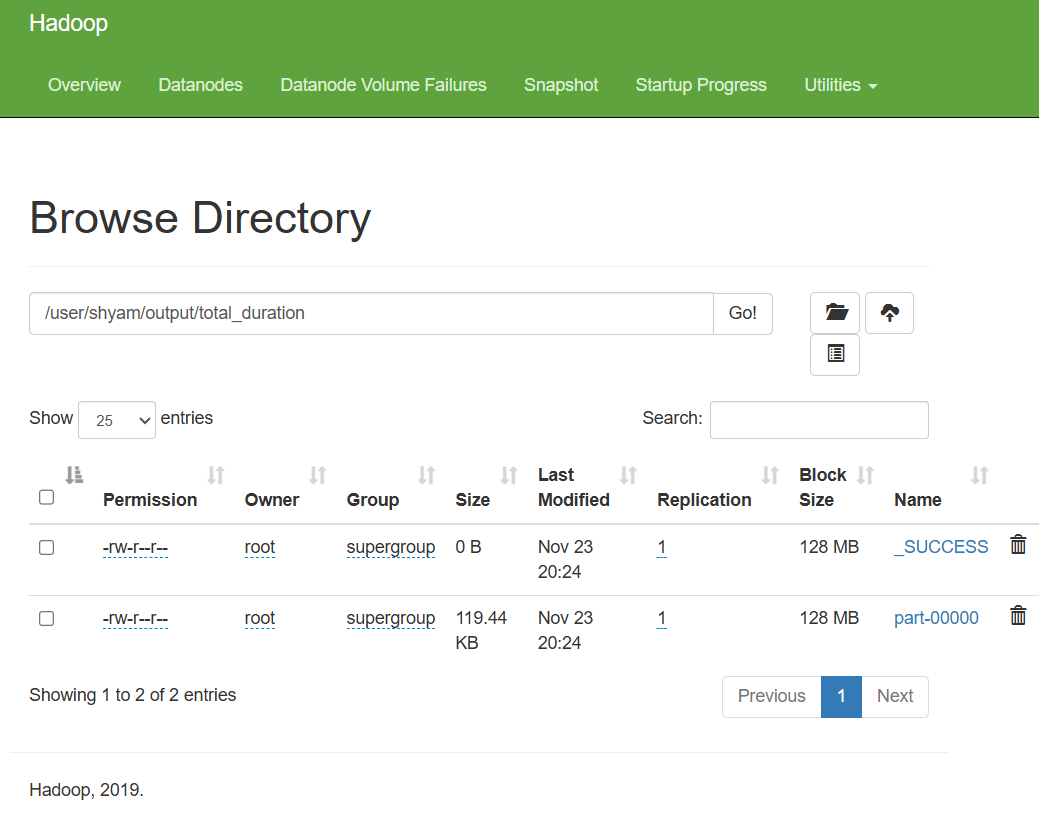


* Here the operation ends and we can use below code to get the data :

```
root@98cd669b6cd4:/# hdfs dfs -cat /user/shyam/output/total_duration/part-*
```
* output:

```
2025-11-23 14:56:35,273 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
975-657830998.1
975-5865        11725.3
799-6668        55394.6
798-9879        7865.12
415-8151        439.48
408-4142        580.36
351-6552        419.67
958-9878        23972.7
799-5956        31555.7
798-9959        63992.9
798-9887        67615.5
335-8146        546.8
334-8967        579.66
328-3266        534.87
959-5955        59680.4
799-5957        132149
798-9967        60249
.... [DUE TO LARGE OUTPUT I'M PASTING FIRST FEW LINES FOR EASE OF READ]
root@98cd669b6cd4:/# 
```
  

# 4 Try the mapper and reducer using YARN

* Check if YARN is running use
  ```
  jps
  ```

```
root@98cd669b6cd4:/# jps
163 NameNode
12147 DataNode
12148 ResourceManager
12149 NodeManager
72312 Jps
root@98cd669b6cd4:/#
```

* Dont' proceed untill we get Name node, data node, resource manager, node manager and jps in output.
* if this is shown that means yarn is running.

* Once we have YARN system then we can remove -D =local and run the normal code

```
root@98cd669b6cd4:/# hadoop jar /opt/hadoop-3.2.1/share/hadoop/tools/lib/hadoop-streaming-3.2.1.jar -files mapper_duration.sh,reducer_duration.sh   -mapper mapper_duration.sh   -reducer reducer_duration.sh   -input /user/shyam/reliance_jio/cdr.csv   -output /user/shyam/output/total_duration
```